**Imports**
pandas for data analysis;
matplotlib for data visualization.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-3-71225e3ad40e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Load** the dataset of client sentiment data

In [30]:
data = pd.read_csv('/drive/data/climatebert-climate-sentiment.csv')
print(data.head())

                                                text  label
0  − Scope 3: Optional scope that includes indire...      1
1  The Group is not aware of any noise pollution ...      0
2  Global climate change could exacerbate certain...      0
3  Setting an investment horizon is part and parc...      0
4  Climate change the physical impacts of climate...      0


**Summarize and plot** the distribution of sentiment labels


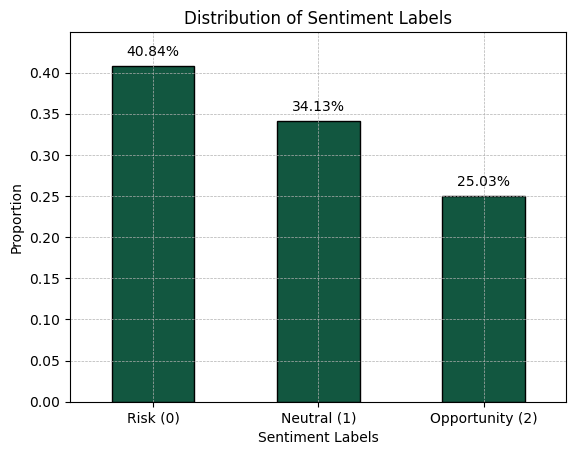

In [31]:
label_distribution = data['label'].value_counts(normalize=True)
ax = label_distribution.plot(kind='bar', color='#125740', edgecolor='black', ylim=(0, label_distribution.max() * 1.1))
plt.xlabel('Sentiment Labels')
plt.ylabel('Proportion')
plt.title('Distribution of Sentiment Labels')
plt.xticks(ticks=[0, 1, 2], labels=['Risk (0)', 'Neutral (1)', 'Opportunity (2)'], rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [35]:
import numpy as np

# Calculate Gini coefficient
def gini_coefficient(distribution):
    distribution_sorted = np.sort(distribution)
    n = len(distribution)
    cumulative_values = np.cumsum(distribution_sorted)
    return (2 / n) * np.sum((np.arange(1, n+1) - (n+1)/2) * distribution_sorted) / np.sum(distribution_sorted)

gini = gini_coefficient(label_distribution.values)
print(f"Gini Coefficient: {gini:.2f}")


Gini Coefficient: 0.11


In [36]:
# Define a threshold for determining if the distribution is balanced
threshold = 0.15  # You can adjust this value as needed

# Check if the Gini coefficient is below the threshold
if gini < threshold:
    print("Balanced Distribution: The sentiment label distribution is balanced.")
else:
    print("Unbalanced Distribution: Consider rebalancing the dataset for better performance.")


Balanced Distribution: The sentiment label distribution is balanced.
